In [1]:
%matplotlib inline
import time
#import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pi_estimate.estimator as es
import pi_estimate.pi_series as ps

time_experiment = ps.Pi_Series(100,1000000,5)

print time_experiment

n=100      3.36          0.0002 seconds
n=1000     3.188         0.0017 seconds
n=10000    3.1372        0.0163 seconds
n=100000   3.14764       0.1752 seconds
n=1000000  3.140952      1.7070 seconds



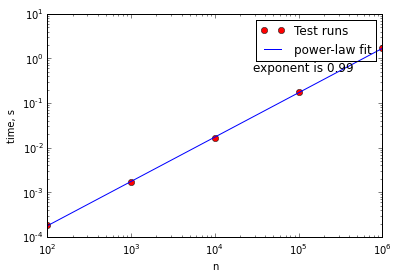

In [2]:
A = np.vstack([np.log(time_experiment.counts), np.ones(len(time_experiment.counts))]).T
m,c = np.linalg.lstsq(A, np.log(time_experiment.times))[0]

plt.loglog(time_experiment.counts,time_experiment.times,'ro',label='Test runs')
plt.loglog(time_experiment.counts,np.exp(m*np.log(time_experiment.counts)+c),label='power-law fit')
plt.legend()
plt.figtext(0.6,0.7,"exponent is %.2f"%m, fontsize = 12)

plt.ylabel('time, s')
plt.xlabel('n')
plt.show()

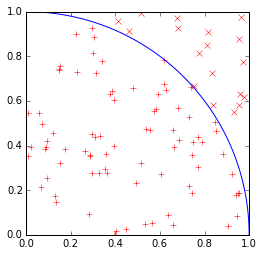

In [3]:
es100 = es.pi_estimator(100)
x = es100.tosses[:,0]
y = es100.tosses[:,1]

withincircle = x**2+y**2<1

plt.plot(x[withincircle],y[withincircle],'r+')
plt.plot(x[~withincircle],y[~withincircle],'rx',markerfacecolor='red')
theta = np.linspace(0,np.pi/2,num=50)
plt.plot(np.cos(theta),np.sin(theta))
plt.gca().set_aspect('equal')
plt.gca().set_xbound(lower=0,upper=1)
plt.gca().set_ybound(lower=0,upper=1)
plt.show()

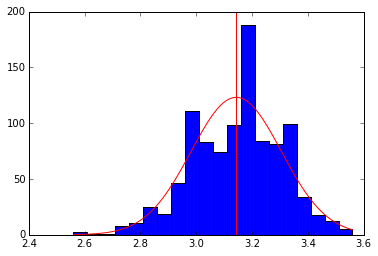

In [4]:
tries=1000
n=100
bin_number=20

hist_experiment = ps.Pi_Series(n,runs=tries)
estimates = np.array(hist_experiment.estims)
    
n,bins,patches = plt.hist(estimates,bins=bin_number)

binwidth = bins[1]-bins[0]
histarea = binwidth*tries

mean = np.mean(estimates)
sigma = np.std(estimates)

def normpdf(x,sigma,mean):
    return 1./sigma/np.sqrt(2*np.pi)*np.exp(-(x-mean)**2/(2*sigma**2))

plt.axvline(mean,color='r')
x = np.linspace(bins[0],bins[-1],100)
plt.plot(x,histarea*normpdf(x,sigma,mean),color='r')
plt.show()

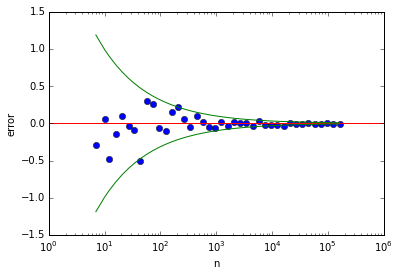

In [6]:
runs_experiment = ps.Pi_Series(np.exp(2),np.exp(12),40)

cous=np.array(runs_experiment.counts)
ests=np.array(runs_experiment.estims)
plt.semilogx(cous, ests-np.pi,'bo')
plt.axhline(0,color='r')

sigmas=4*np.sqrt(np.pi**2/16/cous)
plt.semilogx(cous, sigmas,color='g')
plt.semilogx(cous,-sigmas,color='g')

plt.ylabel('error')
plt.xlabel('n')

plt.show()